## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

### Aluno: Felipe Aparecido da Silva

(Dígito final do nºUSP: 2)

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

---

In [101]:
# Bibliotecas que serão usadas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

---


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [102]:
# 1. Carregamento dos Dados
df = pd.read_csv('datasets/sneeze2.csv')
df = df.iloc[:, 1:]
display(df.head())
print("Informações do Dataset:")
df.info()

,nsneeze,alcohol,antihist,smoker,age,pollen
0,78,0,0,0,32.0,81.085959
1,8,0,0,0,41.0,53.888183
2,34,0,0,1,39.0,92.455084
3,7,0,0,0,56.0,41.246594
4,8,0,0,0,36.0,91.036921


Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nsneeze   1400 non-null   int64  
 1   alcohol   1400 non-null   int64  
 2   antihist  1400 non-null   int64  
 3   smoker    1400 non-null   int64  
 4   age       1400 non-null   float64
 5   pollen    1400 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 65.8 KB



Resumo Estatístico de nsneeze:


count    1400.000000
mean       23.425000
std        49.201546
min         0.000000
25%         6.000000
50%        12.000000
75%        22.000000
max       940.000000
Name: nsneeze, dtype: float64

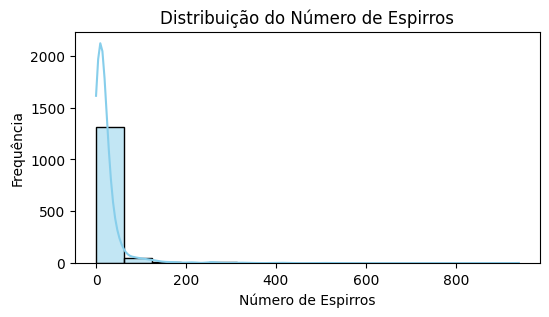

In [103]:
# 2. Análise Descritiva da Variável Resposta (nsneeze)
print("\nResumo Estatístico de nsneeze:")
display(df['nsneeze'].describe())
plt.figure(figsize=(6, 3))
sns.histplot(df['nsneeze'], kde=True, bins=15, color='skyblue')
plt.title('Distribuição do Número de Espirros')
plt.xlabel('Número de Espirros')
plt.ylabel('Frequência')
plt.show()

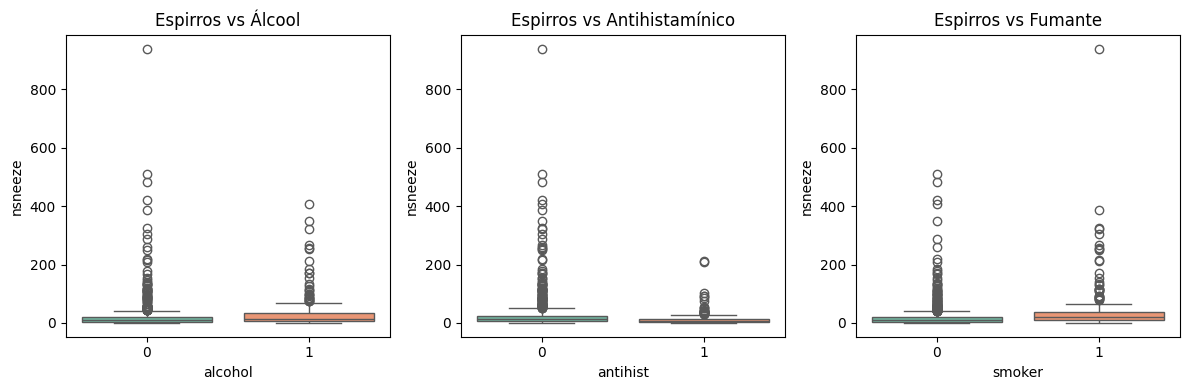

In [104]:
# 3. Associação com Variáveis Categóricas (Boxplots)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(x='alcohol', y='nsneeze', data=df, ax=axes[0], hue='alcohol', palette='Set2', legend=False)
axes[0].set_title('Espirros vs Álcool')

sns.boxplot(x='antihist', y='nsneeze', data=df, ax=axes[1], hue='antihist', palette='Set2', legend=False)
axes[1].set_title('Espirros vs Antihistamínico')

sns.boxplot(x='smoker', y='nsneeze', data=df, ax=axes[2], hue='smoker', palette='Set2', legend=False)
axes[2].set_title('Espirros vs Fumante')

plt.tight_layout()
plt.show()

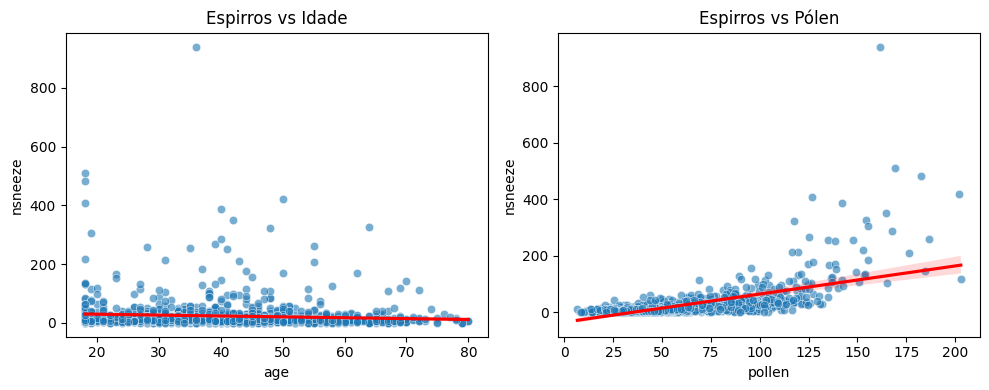


Matriz de Correlação:


,nsneeze,age,pollen
nsneeze,1.000000,-0.082396,0.601010
age,-0.082396,1.000000,-0.023226
pollen,0.601010,-0.023226,1.000000


In [105]:
# 4. Associação com Variáveis Quantitativas (Scatterplots)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(x='age', y='nsneeze', data=df, ax=axes[0], alpha=0.6)
sns.regplot(x='age', y='nsneeze', data=df, ax=axes[0], scatter=False, color='red')
axes[0].set_title('Espirros vs Idade')

sns.scatterplot(x='pollen', y='nsneeze', data=df, ax=axes[1], alpha=0.6)
sns.regplot(x='pollen', y='nsneeze', data=df, ax=axes[1], scatter=False, color='red')
axes[1].set_title('Espirros vs Pólen')

plt.tight_layout()
plt.show()

print("\nMatriz de Correlação:")
display(df[['nsneeze', 'age', 'pollen']].corr())

##### Análise:

Ao observar a distribuição do número de espirros (`nsneeze`), notamos que a maioria das pessoas tem poucos episódios, mas existe uma "cauda" longa com valores extremamente altos (chegando a 940 espirros). Isso gera uma variabilidade gigante nos dados, muito maior do que a média (que é apenas 23). Estatisticamente, esse comportamento é um sinal de possível "superdispersão", o que já nos alerta que um modelo básico (como o de Poisson) provavelmente será insuficiente para explicar esses dados, sendo necessário algo mais robusto como a Binomial Negativa.

Quanto às relações com as outras variáveis, o destaque vai para o pólen: os gráficos mostram que quanto maior a concentração de pólen, maior o número de espirros (correlação positiva de 0.60). Já a idade parece não influenciar em nada, pois a linha de tendência é praticamente uma reta paralela ao eixo horizontal. Por fim, ao comparar os grupos (quem bebe, fuma ou toma remédio), vemos muitos *outliers*, o que reforça que precisamos de um modelo estatístico cuidadoso para capturar essas diferenças sem se deixar levar apenas pela média.

---

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [106]:
# Definindo a fórmula
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# Ajustando o modelo GLM com família Poisson
modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)
ajuste_pois = modelo_pois.fit()

# Apresentando os resultados
print("=== Resumo do Modelo de Poisson ===")
print(ajuste_pois.summary())

=== Resumo do Modelo de Poisson ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1400
Model:                            GLM   Df Residuals:                     1394
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8511.6
Date:                Sat, 29 Nov 2025   Deviance:                       11077.
Time:                        00:49:52   Pearson chi2:                 1.15e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Inte

##### Interpretação dos Resultados do Modelo de Poisson:

Ao ajustarmos o modelo de Poisson, observamos na tabela de resumo os seguintes pontos sobre a significância estatística e os efeitos das variáveis:

**1. Significância Estatística (P-valor):**
Todas as variáveis preditoras incluídas no modelo (**alcohol**, **antihist**, **smoker**, **age** e **pollen**) apresentaram p-valores extremamente baixos (`P>|z| = 0.000`). Isso indica que, sob a suposição deste modelo, **todos os fatores são estatisticamente significativos** para explicar a variação no número de espirros.

> *Nota:* O fato de todas as variáveis parecerem extremamente importantes é suspeito, isso pode ser um indício de que os erros padrão estão subestimados devido à presença de superdispersão nos dados, o que tornaria o modelo excessivamente "otimista" ao rejeitar a hipótese nula.

**2. Análise dos Coeficientes (`coef`):**
Os sinais dos coeficientes nos mostram a direção do efeito de cada variável sobre a contagem de espirros:

* **Fatores de Risco (Coeficiente Positivo):**
    * **Fumo (`smoker`, 0.68):** É o fator com maior impacto positivo individual (considerando variáveis binárias), indicando que fumantes tendem a ter uma taxa de espirros substancialmente maior.
    * **Álcool (`alcohol`, 0.32):** O consumo de álcool também está associado ao aumento do número esperado de espirros.
    * **Pólen (`pollen`, 0.026):** Há uma relação positiva e linear; quanto maior a concentração de pólen no ar, maior a frequência de espirros.

* **Fatores de Proteção (Coeficiente Negativo):**
    * **Antihistamínico (`antihist`, -0.59):** O coeficiente negativo confirma a eficácia do medicamento, associando seu uso a uma redução significativa na contagem esperada de espirros.
    * **Idade (`age`, -0.01):** Apresenta um efeito redutor leve, sugerindo que, mantidas as outras variáveis constantes, pessoas mais velhas tendem a espirrar um pouco menos.

---


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [107]:
# --- MÉTODO 1: Estatística Descritiva (Phi) ---
# Calculamos a razão entre o Qui-quadrado de Pearson e os Graus de Liberdade
phi_estimado = ajuste_pois.pearson_chi2 / ajuste_pois.df_resid

print(f"=== Método 1: Índice de Dispersão ===")
print(f"Qui-quadrado de Pearson: {ajuste_pois.pearson_chi2:.2f}")
print(f"Graus de Liberdade: {ajuste_pois.df_resid}")
print(f"Parâmetro Phi estimado: {phi_estimado:.4f}")

=== Método 1: Índice de Dispersão ===
Qui-quadrado de Pearson: 11489.63
Graus de Liberdade: 1394
Parâmetro Phi estimado: 8.2422


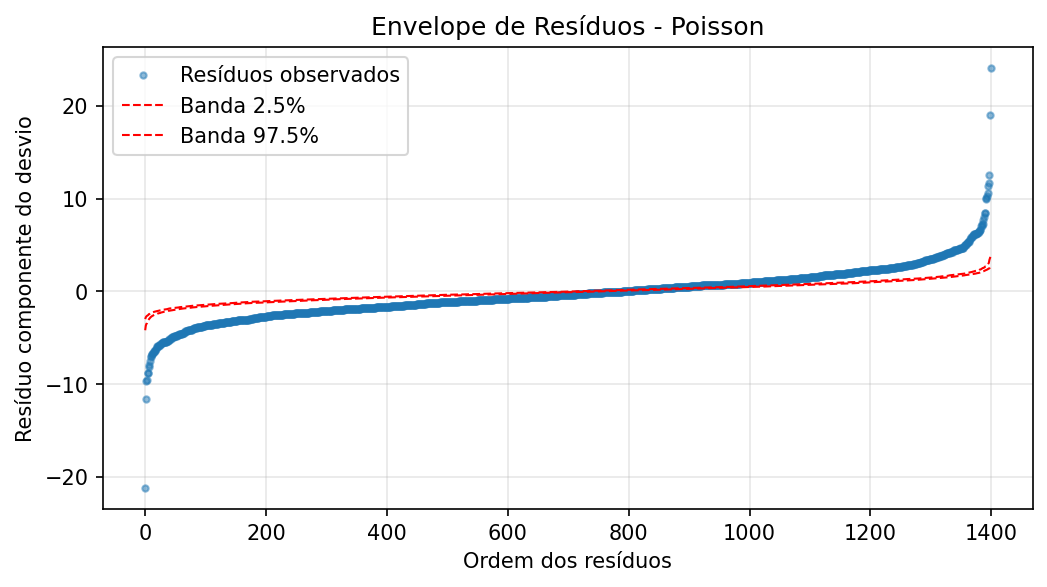

In [108]:

# --- MÉTODO 2: Envelope Simulado (Gráfico) ---
# Definição das preditoras (X) com adição de constante (intercepto)
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]
X = sm.add_constant(preditoras) 

# Função fornecida
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados", alpha=0.5, markersize=3)
    plt.plot(lower, 'r--', linewidth=1, label="Banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="Banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True, alpha=0.3)

# Gerando o gráfico
plt.figure(figsize=(8, 4), dpi=150)
envelope_poisson(ajuste_pois, X, "Envelope de Resíduos - Poisson")
plt.show()

##### Análise da Dispersão:

No primeiro método, foi feito o cálculo matemático do índice de dispersão ($\phi$), dividindo o qui-quadrado pelos graus de liberdade. O resultado foi **8.24**, um valor muito acima de 1 (que seria o ideal no modelo de Poisson). Isso confirma numericamente a "superdispersão": existe muito mais variabilidade nos dados do que o modelo consegue explicar.

O segundo teste foi visual, através do gráfico de envelope. Nele, vemos claramente que a grande maioria dos pontos azuis "escapa" das faixas pontilhadas vermelhas, indicando um péssimo ajuste. Se o modelo fosse adequado, os pontos estariam contidos dentro dessas faixas de confiança. Como não estão, concluímos que o modelo de Poisson é inadequado para esses dados e precisamos avançar para outro modelo.

---

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [109]:


formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.3

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1400
Model:                            GLM   Df Residuals:                     1394
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4894.5
Date:                Sat, 29 Nov 2025   Deviance:                       1569.9
Time:                        00:49:52   Pearson chi2:                 1.41e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9451
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5238      0.064  

In [110]:
# 1. Ajuste com Alpha FIXO fornecido
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"
alpha_fixado = 0.3
modelo_nb_fixo = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)
ajuste_nb = modelo_nb_fixo.fit()
print("=== Resumo do Modelo (Alpha Fixo = 0.3) ===")
print(ajuste_nb.summary())

# 2. Verificação do valor Alpha
modelo_investigacao = smf.negativebinomial(formula, data=df).fit()
alpha_real_estimado = modelo_investigacao.params['alpha']

print("\n=== Validação do Parâmetro Alpha ===")
print(f"Alpha fixado fornecido: {alpha_fixado}")
print(f"Alpha ideal estimado pelos dados: {alpha_real_estimado:.4f}")

if abs(alpha_fixado - alpha_real_estimado) < 0.05:
    print("CONCLUSÃO: O valor fixado é muito próximo do ideal.")
else:
    print("CONCLUSÃO: O valor fixado é um pouco diferente do ideal.")



=== Resumo do Modelo (Alpha Fixo = 0.3) ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1400
Model:                            GLM   Df Residuals:                     1394
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4894.5
Date:                Sat, 29 Nov 2025   Deviance:                       1569.9
Time:                        00:49:52   Pearson chi2:                 1.41e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9451
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------


=== Comparação de Ajuste (Poisson vs Bin Neg) ===


,Métrica,Modelo Poisson,Modelo Binomial Neg.
0,AIC,17035.126988,9801.096462
1,Deviance,11077.476080,1569.934993


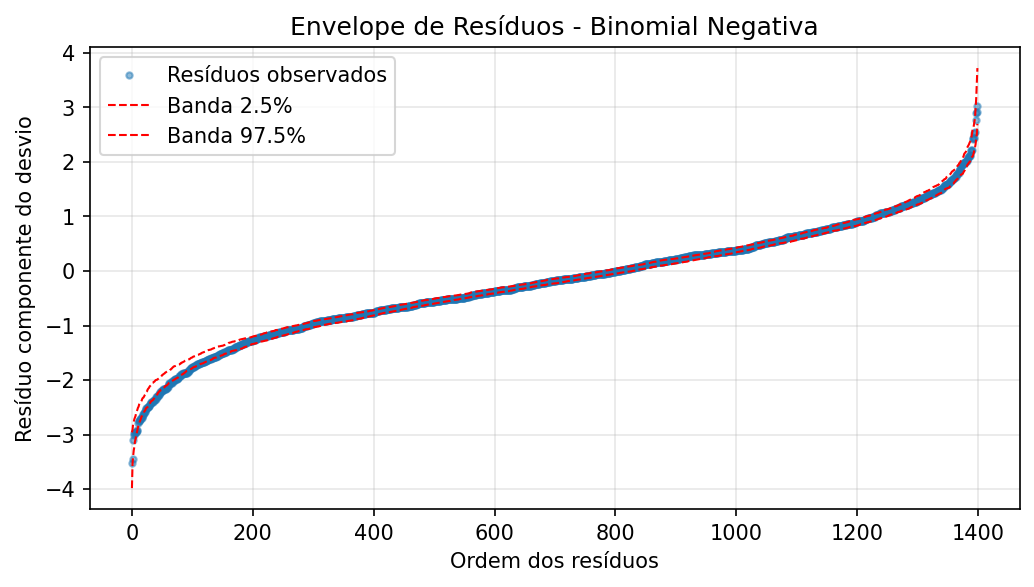

In [111]:
# 3. Comparação com Poisson
metricas = pd.DataFrame({
    'Métrica': ['AIC', 'Deviance'],
    'Modelo Poisson': [ajuste_pois.aic, ajuste_pois.deviance],
    'Modelo Binomial Neg.': [ajuste_nb.aic, ajuste_nb.deviance]
})

print("\n=== Comparação de Ajuste (Poisson vs Bin Neg) ===")
display(metricas)

# 4. Diagnóstico Gráfico
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados", alpha=0.5, markersize=3)
    plt.plot(lower, "r--", linewidth=1, label="Banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="Banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True, alpha=0.3)

# Gerar o gráfico
plt.figure(figsize=(8, 4), dpi=150)
envelope_negbin(ajuste_nb, "Envelope de Resíduos - Binomial Negativa")
plt.show()

##### Comparação e Escolha do Modelo:

Ao comparar os modelos, percebe-se um melhor adequamento do modelo Binomial Negativo em relação ao Poisson. As métricas de ajuste sofreram autas reduções, com o AIC caindo de aproximadamente 17.035 para 9.801 e o Deviance de 11.077 para 1.569, o que prova que a superdispersão foi corretamente modelada. Validamos também o parâmetro de dispersão fixado em 0.3, visto que a estimativa real pelos dados resultou em 0.3119, confirmando que a escolha foi estatisticamente precisa.

Essa conclusão é reforçada pelo diagnóstico visual: diferentemente do modelo anterior, o gráfico de envelope mostra que os resíduos agora se comportam bem, permanecendo dentro das bandas de confiança de 95%. Portanto, o modelo Binomial Negativo é uma escolha mais adequada para descrever o número de espirros.


---



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [112]:
def calcular_efeito_marginal_binario(modelo, df, variavel):
    # Cria cópia dos dados forçando a variável para 0
    df_0 = df.copy()
    df_0[variavel] = 0
    pred_0 = modelo.predict(df_0)
    
    # Cria cópia dos dados forçando a variável para 1
    df_1 = df.copy()
    df_1[variavel] = 1
    pred_1 = modelo.predict(df_1)
    
    # AME (Average Marginal Effect)
    ame = (pred_1 - pred_0).mean()
    return ame

# Calculando para Álcool e Antihistamínico
ame_alcohol = calcular_efeito_marginal_binario(ajuste_nb, df, 'alcohol')
ame_antihist = calcular_efeito_marginal_binario(ajuste_nb, df, 'antihist')

print("=== Efeitos Marginais Médios ===")
print(f"Álcool (alcohol): {ame_alcohol:.4f} espirros a mais/menos")
print(f"Antihistamínico (antihist): {ame_antihist:.4f} espirros a mais/menos")

=== Efeitos Marginais Médios ===
Álcool (alcohol): 8.6852 espirros a mais/menos
Antihistamínico (antihist): -11.4326 espirros a mais/menos


##### Interpretação dos Efeitos Marginais:

Os cálculos mostram o impacto prático (em número de espirros) de cada substância. Em média, o consumo de álcool está associado a um aumento de aproximadamente **8,7 espirros** por dia, mantendo os outros fatores constantes. Por outro lado, o uso de antihistamínico exerce um forte efeito protetor: indivíduos que utilizam o medicamento têm, em média, uma redução de cerca de **11,4 espirros** diários em comparação aos que não utilizam.

---

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [113]:
# 1. Separação dos dados (80% Treino, 20% Teste)
train, test = train_test_split(df, test_size=0.20, random_state=42)

print(f"Tamanho do Treino: {train.shape[0]}")
print(f"Tamanho do Teste: {test.shape[0]}")

# Definindo a fórmula comum
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# 2. Ajuste dos Modelos APENAS no Treino
# Modelo Poisson
modelo_pois_treino = smf.glm(
    formula=formula,
    data=train,
    family=sm.families.Poisson()
).fit()

# Modelo Binomial Negativo (Alpha fixo 0.3)
modelo_nb_treino = smf.glm(
    formula=formula,
    data=train,
    family=sm.families.NegativeBinomial(alpha=0.3)
).fit()

# 3. Predições no conjunto de Teste
pred_pois = modelo_pois_treino.predict(test)
pred_nb = modelo_nb_treino.predict(test)

# 4. Cálculo das Métricas (EQM/RMSE e EAM/MAE)
rmse_pois = np.sqrt(mean_squared_error(test['nsneeze'], pred_pois))
rmse_nb = np.sqrt(mean_squared_error(test['nsneeze'], pred_nb))

# MAE = Erro Absoluto Médio
mae_pois = mean_absolute_error(test['nsneeze'], pred_pois)
mae_nb = mean_absolute_error(test['nsneeze'], pred_nb)

# 5. Tabela de Comparação
comparacao = pd.DataFrame({
    'Métrica': ['RMSE (EQM)', 'MAE (EAM)'],
    'Poisson': [rmse_pois, mae_pois],
    'Binomial Negativa': [rmse_nb, mae_nb]
})

print("\n=== Comparação de Desempenho Preditivo (Teste) ===")
display(comparacao)

Tamanho do Treino: 1120
Tamanho do Teste: 280

=== Comparação de Desempenho Preditivo (Teste) ===


,Métrica,Poisson,Binomial Negativa
0,RMSE (EQM),24.783629,24.755226
1,MAE (EAM),11.781760,11.645163


##### Comparação de Desempenho Preditivo:

A avaliação nos dados de teste revelou que a Binomial Negativa apresenta um desempenho preditivo superior ao modelo de Poisson. Observando as métricas, o Erro Quadrático Médio (RMSE) foi menor para a Binomial Negativa (24,76 contra 24,78 do Poisson), assim como o Erro Absoluto Médio (MAE), que caiu de 11,78 no Poisson para 11,65 na Binomial Negativa. Esses resultados confirmam que as conclusões obtidas pelos critérios de ajuste (AIC e Deviance) coincidem com a capacidade preditiva do modelo. O modelo Binomial Negativo, que já havia se mostrado superior teoricamente por tratar a superdispersão, provou ser também o mais preciso para estimar novos casos.

---

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [114]:
# 1. Definindo os cenários de Pólen
# Baixa concentração = 1º Quartil (25%)
# Alta concentração = 3º Quartil (75%)
pollen_baixo = df['pollen'].quantile(0.25)
pollen_alto = df['pollen'].quantile(0.75)

print(f"Critério adotado para Baixa concentração (25%): {pollen_baixo:.2f}")
print(f"Critério adotado para Alta concentração (75%):  {pollen_alto:.2f}")

# 2. Criando o DataFrame com os dois perfis exatos do enunciado
perfis = pd.DataFrame({
    'alcohol':  [0, 1],          # Indivíduo A (0) vs B (1)
    'antihist': [1, 0],          # Indivíduo A (1) vs B (0)
    'smoker':   [0, 1],          # Indivíduo A (0) vs B (1)
    'age':      [30, 50],        # Indivíduo A (30) vs B (50)
    'pollen':   [pollen_baixo, pollen_alto]
}, index=['Indivíduo A', 'Indivíduo B'])

# 3. Realizando a previsão com o modelo Binomial Negativo (ajuste_nb)
previsoes = ajuste_nb.predict(perfis)
print("\n=== Número Esperado de Espirros (Previsão) ===")
for individuo, valor in zip(perfis.index, previsoes):
    print(f"{individuo}: {valor:.2f} espirros")

Critério adotado para Baixa concentração (25%): 37.64
Critério adotado para Alta concentração (75%):  73.82

=== Número Esperado de Espirros (Previsão) ===
Indivíduo A: 4.63 espirros
Indivíduo B: 45.16 espirros


##### Conclusão das Previsões:

O modelo ilustra de forma clara o impacto acumulado dos fatores de risco. Para o **Indivíduo A**, que utiliza antihistamínico, não possui hábitos de risco (álcool/fumo) e está em um ambiente de baixo pólen, o modelo prevê uma crise muito leve, com apenas **4,63 espirros** esperados no dia.

Por outro lado, o **Indivíduo B**, que consome álcool, fuma, não usa medicação e enfrenta alta concentração de pólen, tem uma previsão alarmante de **45,16 espirros**. Isso representa um aumento de quase **10 vezes** na intensidade da crise alérgica em comparação ao primeiro perfil, demonstrando quantitativamente como a combinação de hábitos nocivos e fatores ambientais agrava o quadro de rinite.

---